In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model, layers
from glob import glob
from PIL import Image
import os
import zipfile
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
# GPU 할당 상태 확인

tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
# !unzip -uq 'test-20220603T000915Z-001.zip' -d 'test'

In [4]:
# !unzip -uq 'train-20220603T000944Z-001.zip' -d 'train'

In [5]:
# !unzip -uq 'valid-20220603T000946Z-001.zip' -d 'valid'

In [6]:
image_dates_train_nak = glob('./test/1*.jpg')

In [7]:
# 데이터 packing

image_dates_train_nak = glob('./train/1*.jpg')
image_dates_train_scub = glob('./train/2*.jpg')
image_dates_train_oster = glob('./train/3*.jpg')

image_dates_valid_nak = glob('./valid/1*.jpg')
image_dates_valid_scub = glob('./valid/2*.jpg')
image_dates_valid_oster = glob('./valid/3*.jpg')

image_dates_test_nak = glob('./test/1*.jpg')
image_dates_test_scub = glob('./test/2*.jpg')
image_dates_test_oster = glob('./test/3*.jpg')

class_name = ['nacksungdae','scubhome', 'osteria']
dic = {'nacksungdae' : 0, 'scubhome' : 1, 'osteria' : 2}

In [8]:
X_train = []
Y_train = []
X_valid = []
Y_valid = []
X_test = []
Y_test = []

for imagename in image_dates_train_nak:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(0)
    
for imagename in image_dates_train_scub:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(1)    
    
for imagename in image_dates_train_oster:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(2)
    
for imagename in image_dates_valid_nak:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(0)
    
for imagename in image_dates_valid_scub:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(1)    
    
for imagename in image_dates_valid_oster:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(2)
    
for imagename in image_dates_test_nak:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(0)
    
for imagename in image_dates_test_scub:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(1)    
    
for imagename in image_dates_test_oster:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(2)
    
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_valid = np.array(X_valid)
Y_valid = np.array(Y_valid)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(X_train.shape, Y_train.shape)
print(X_valid.shape, Y_valid.shape)
print(X_test.shape, Y_test.shape)

(9180, 200, 200, 3) (9180,)
(3060, 200, 200, 3) (3060,)
(3060, 200, 200, 3) (3060,)


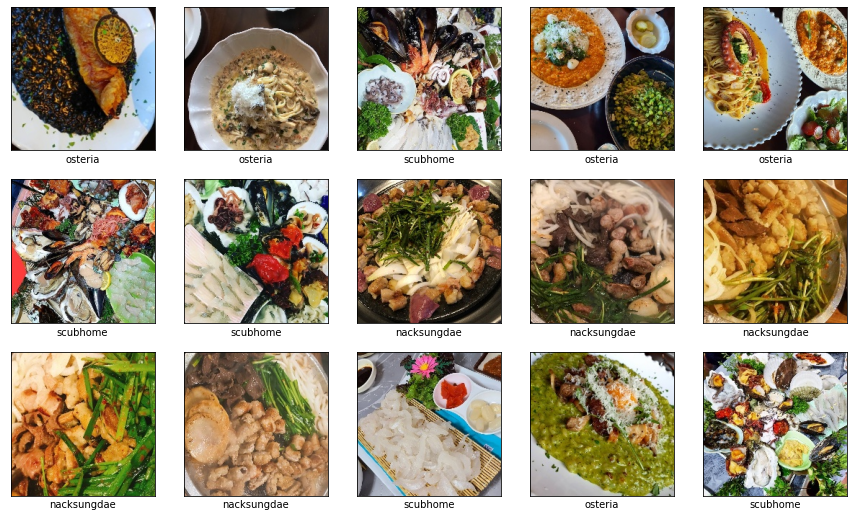

In [9]:
# train_images, test_images, train_labels, test_labels = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 44)

# print(train_images.shape, test_images.shape)
# print(train_labels.shape, test_labels.shape)
%matplotlib inline 
N_TRAIN = X_train.shape[0]
N_TEST = X_valid.shape[0]

plt.figure(figsize = (15, 9))

# train data image 확인

for i in range(15):
    img_idx = np.random.randint(0, N_TRAIN)
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.grid(False)
    plt.imshow(X_train[img_idx])
    plt.xlabel(class_name[Y_train[img_idx]])

In [10]:
#데이터 클래스가 잘 나뉘었는지 확인

unique, counts = np.unique(np.reshape(Y_train, (N_TRAIN,)), axis = -1, return_counts = True)
dict(zip(unique, counts))

{0: 3060, 1: 3060, 2: 3060}

In [11]:
#min-max scaling

X_train = X_train.astype(np.float32) / 255
X_valid = X_valid.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

x_train = X_train.reshape(-1, 200, 200, 3)
x_test = X_test.reshape(-1, 200, 200, 3)
x_valid = X_valid.reshape(-1, 200, 200, 3)

y_train = Y_train
y_test = Y_test
y_valid = Y_valid


print('train data : X ', x_train.shape, ' Y ', y_train.shape)
print('valid data : X ', x_valid.shape, ' Y ', y_valid.shape)
print('test data : X ', x_test.shape, ' Y ', y_test.shape)

data = [x_train, y_train, x_valid, y_valid, x_test, y_test]

train data : X  (9180, 200, 200, 3)  Y  (9180,)
valid data : X  (3060, 200, 200, 3)  Y  (3060,)
test data : X  (3060, 200, 200, 3)  Y  (3060,)


In [12]:
cnn = Sequential()

cnn.add(layers.Conv2D(32, 3, strides=1, padding='same', activation='relu', input_shape=(200, 200, 3))) 
cnn.add(layers.MaxPool2D(3, strides=2, padding='same'))
cnn.add(layers.Conv2D(64, 3, strides=1, padding='same', activation='relu'))
cnn.add(layers.MaxPool2D(3, strides=2, padding='same'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(128, activation='relu'))
cnn.add(layers.Dense(3, activation='softmax'))

In [13]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate=0.1), metrics = ['accuracy'])

In [14]:
result = cnn.fit(x_train, y_train, epochs = 20, validation_data = (x_valid, y_valid))

Epoch 1/20
287/287 [==============================] - 9s 31ms/step - loss: 1.1137 - accuracy: 0.3595 - val_loss: 1.0992 - val_accuracy: 0.4408
Epoch 2/20
287/287 [==============================] - 8s 27ms/step - loss: 1.0920 - accuracy: 0.3612 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 3/20
287/287 [==============================] - 8s 27ms/step - loss: 1.0991 - accuracy: 0.3471 - val_loss: 1.1029 - val_accuracy: 0.3333
Epoch 4/20
287/287 [==============================] - 8s 27ms/step - loss: 1.0813 - accuracy: 0.4025 - val_loss: 1.1146 - val_accuracy: 0.3493
Epoch 5/20
287/287 [==============================] - 8s 27ms/step - loss: 0.9211 - accuracy: 0.5524 - val_loss: 0.9145 - val_accuracy: 0.5742
Epoch 6/20
287/287 [==============================] - 8s 27ms/step - loss: 0.7710 - accuracy: 0.6643 - val_loss: 1.1163 - val_accuracy: 0.3621
Epoch 7/20
287/287 [==============================] - 8s 27ms/step - loss: 0.6420 - accuracy: 0.7307 - val_loss: 0.9861 - val_accuracy: 0.5879

In [15]:
test_result = cnn.evaluate(x_test, y_test)
print('test loss: ', test_result[0])
print('test acc: ', test_result[1])

96/96 [==============================] - 1s 10ms/step - loss: 2.2420 - accuracy: 0.6895
test loss:  2.241950273513794
test acc:  0.6895424723625183


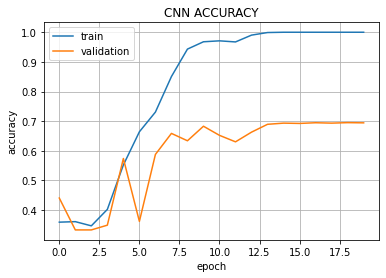

In [16]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('CNN ACCURACY')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['train','validation'], loc = 'best')

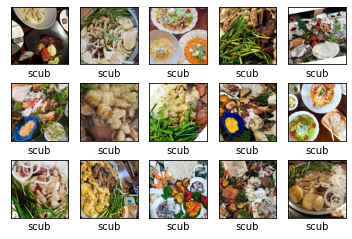

In [36]:
# 학습 결과 labeling

for i in range(15):
    img_idx = np.random.randint(0, N_TRAIN)
    im = np.reshape(x_train[img_idx], (-1, 200, 200, 3))
    classnum = np.argmax(cnn.predict(im))
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.grid(False)
    plt.imshow(x_train[img_idx])
    name = ''
    if classnum == 0 : name = 'naksung'
    elif classnum == 1 : name = 'scub'
    else : name = 'osteria'
    plt.xlabel(name)